In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [59]:
%%timeit -r 1 -o
import numpy as np
A = np.mat('1 2 3; 7 4 9; 5 6 1')
np.linalg.inv(A)

70.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)


<TimeitResult : 70.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)>

In [46]:
%lsmagic

Available line magics:
%aimport  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autoreload  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%

In [44]:
res = _

In [45]:
vars(res)

TypeError: vars() argument must have __dict__ attribute

In [3]:
from optimus import Optimus

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [4]:
op = Optimus("spark", master="local[*]", app_name="optimus", comm=True)

ENGINE spark



    You are using PySparkling of version 2.4.10, but your PySpark is of
    version 2.3.1. Please make sure Spark and PySparkling versions are compatible. 


In [5]:
df = op.load.csv("data/crime.csv", sep=",", header=True, null_value="null", infer_schema='true').ext.cache()

In [6]:
df.cols.names()

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [9]:
%%time
df.cols.frequency("*")

Wall time: 0 ns


{'OCCURRED_ON_DATE': [{'value': datetime.datetime(2017, 6, 1, 0, 0),
   'count': 29},
  {'value': datetime.datetime(2016, 8, 1, 0, 0), 'count': 27},
  {'value': datetime.datetime(2015, 7, 1, 0, 0), 'count': 27},
  {'value': datetime.datetime(2015, 6, 18, 5, 0), 'count': 22},
  {'value': datetime.datetime(2017, 8, 1, 0, 0), 'count': 22},
  {'value': datetime.datetime(2017, 1, 1, 0, 0), 'count': 21},
  {'value': datetime.datetime(2015, 12, 7, 11, 38), 'count': 20},
  {'value': datetime.datetime(2017, 5, 1, 0, 0), 'count': 20},
  {'value': datetime.datetime(2016, 4, 1, 0, 0), 'count': 20},
  {'value': datetime.datetime(2017, 4, 1, 0, 0), 'count': 19}],
 'INCIDENT_NUMBER': [{'value': 'I162030584', 'count': 13},
  {'value': 'I152080623', 'count': 11},
  {'value': 'I172096394', 'count': 10},
  {'value': 'I172013170', 'count': 10},
  {'value': 'I182065208', 'count': 10},
  {'value': 'I172022524', 'count': 9},
  {'value': 'I162001871', 'count': 9},
  {'value': 'I172054429', 'count': 9},
  {'va

In [6]:
df = op.save.parquet("crime.parquet")

AttributeError: 'DaskEngine' object has no attribute 'save'

In [ ]:
df.ext.to_dict()

In [7]:
df["id"].nunique_approx().compute()

13.001289538211168

In [8]:
df.cols.count_uniques("id")

{'id': {'count_uniques': 13}}

In [9]:
df.ext.send()

Send!


In [10]:
df.ext.send()

Send!


In [17]:
df1= df.cols.select("*", data_type=df.constants.NUMERIC_TYPES, invert=True)

In [12]:
df.cols.frequency("*", 7, True)

{'id': [{'value': 13, 'count': 1, 'percentage': 7.69},
  {'value': 12, 'count': 1, 'percentage': 7.69},
  {'value': 11, 'count': 1, 'percentage': 7.69},
  {'value': 10, 'count': 1, 'percentage': 7.69},
  {'value': 9, 'count': 1, 'percentage': 7.69},
  {'value': 8, 'count': 1, 'percentage': 7.69},
  {'value': 7, 'count': 1, 'percentage': 7.69}],
 'firstName': [{'value': 'PAUL', 'count': 1, 'percentage': 7.69},
  {'value': 'NiELS', 'count': 1, 'percentage': 7.69},
  {'value': 'Luis', 'count': 1, 'percentage': 7.69},
  {'value': 'Johannes', 'count': 1, 'percentage': 7.69},
  {'value': 'JaMES', 'count': 1, 'percentage': 7.69},
  {'value': 'Isaac', 'count': 1, 'percentage': 7.69},
  {'value': 'Galileo', 'count': 1, 'percentage': 7.69}],
 'lastName': [{'value': 'dirac$', 'count': 1, 'percentage': 7.69},
  {'value': 'Nöether$', 'count': 1, 'percentage': 7.69},
  {'value': 'Newton', 'count': 1, 'percentage': 7.69},
  {'value': 'M$$ax%%well', 'count': 1, 'percentage': 7.69},
  {'value': 'KEPLER

In [13]:
df.ext.send(output="json", infer=False, advanced_stats=False)

'{"queue_name": "ee8e887f-fac1-4555-aa54-90037f197099", "data": "gAAAAABeRGUbfK3n1RivFVFUDIN4ZZrJ9G2pLk-inn4X4rTPiujhm8S2ffqYoG6wZb4fSjp8RDFuYZpuaFN9zh1b9qP2KuUv9P5RWwVIS8RSrCXFhr-Ysm6Z0MOF1EF9TCx0gIzLhu65tXDjE_TxCP3pt4v8a8loH_OUXbhWn15Uf5mPAMCZYiTNz1QUyaHMW2ED68MTeM82wHssZhR282_Hb-Okm1Vxm8QLYoTm53akaro85wPTQuouRV70TFtPXqCinHdnWgNGku5EIh5mS9_ZYlfJqNAAQ8NKRMnz0AD469ftC6siHirw2r6RzbX0cNwGtiWopogfb5seCSm-ZFudspzmG52DOub5vfUQtaoar0pLZd-_6eaHcd-M-igTrC31s3C0oN_ONsXqbC5YFkod8jDN_Lw1SeBEnv7wAQ7jI36Pr4310eGhMJYaSHBOYjdslbny1BtVGIxTAx5juL2eoVT8tXfEdMAzsw70sbX46ZSVwXhG7S9g8eyxivVSWg7efuz69hyTYExkWgidUi5pQMdnI-zVbdnhUlkZeiTCT5fC1tPejcBO4qq0nIbBkG4JogCEo0qXgy2vjfhECDoFLnttQyIzL54xSiNnFQwGl6W9zosXgKH7Ke__hsHs4eZGWl7fU6eEbq99PIYRGNJ-5GYjXrWl3jsSvhlSEIJhm8OBk7KyQrPU2cEG4Gp9N6gNkU0YiRVmysPYFlYb1yVoH7iMc4iv4DUPeheTZYexh8wRvKmBxzNNPjwGj8MBX5Lg-A1UmlGVil7D9bP18Rs7ikTjnKknnFG0X03Zgdo2hH6rP3UmZCJDZYIPLJpAjEdv5oNnRRefPtFE1L2cSYpL70Fb-xwRT_Ss0fl4OWcr8iaG55cPB6ONZt45avk9wNwf4o71qSNl0lSI5c6IvQQ3TVp2xlZ4tZeMkz9

In [6]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [28]:
import pandas as pd
a = pd.read_csv("data/crime.csv", encoding="latin_1")

In [29]:
a.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [35]:
%%time
for col_name in ["INCIDENT_NUMBER","OFFENSE_CODE"]:
    print(a[col_name].value_counts().nlargest(5))


I162030584    13
I152080623    11
I182065208    10
I172013170    10
I172096394    10
Name: INCIDENT_NUMBER, dtype: int64
3006    18783
3115    18754
3831    16323
1402    15154
802     14799
Name: OFFENSE_CODE, dtype: int64
Wall time: 233 ms


In [16]:
def func(value):
    if value>1:
        print(1)
    return 0
# from dask.dataframe import DataFrame as dd

df['price'].map_partitions(func, meta=("int")).compute()

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply_and_enforce at 0x000001D4932665E8>, <function func at 0x000001D4A93CE678>, [(<built-in function getitem>, (<function check_meta at 0x000001D4931EAEE8>, (<function apply at 0x000001D49046B678>, <function pandas_read_text at 0x000001D49328DAF8>, [<function _make_parser_function.<locals>.parser_f at 0x000001D492E48438>, (<function read_block_from_file at 0x000001D493064F78>, <dask.bytes.core.OpenFile object at 0x000001D4A79D7108>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'null']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtype('O')], ['price', dtype('float64')], ['birth', dtype('O')], ['dummyCol', dtype('O')]]), ['id', 'firstName', 'lastName', 'billingId', 'produc

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [18]:
df.cols.min("firstName")

{}

In [15]:
from dask import dataframe as dd
dd.compute(df["firstName"].min())

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply at 0x000001CBF49EB5E8>, <function _reduction_aggregate at 0x000001CBF77D6EE8>, [(<function _concat at 0x000001CBF6125EE8>, [(<function apply at 0x000001CBF49EB5E8>, <function _reduction_chunk at 0x000001CBF77D6DC8>, [(<built-in function getitem>, (<function check_meta at 0x000001CBF775AE58>, (<function apply at 0x000001CBF49EB5E8>, <function pandas_read_text at 0x000001CBF77FEA68>, [<function _make_parser_function.<locals>.parser_f at 0x000001CBF73B83A8>, (<function read_block_from_file at 0x000001CBF75D4EE8>, <dask.bytes.core.OpenFile object at 0x000001CB8B9E2B08>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'null']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtyp

TypeError: '<=' not supported between instances of 'str' and 'float'

In [43]:
df["firstName"].min().compute()

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply at 0x000002B0DBD979D8>, <function _reduction_aggregate at 0x000002B0DEB7A318>, [(<function _concat at 0x000002B0DD4CF318>, [(<function apply at 0x000002B0DBD979D8>, <function _reduction_chunk at 0x000002B0DEB7A1F8>, [(<built-in function getitem>, (<function check_meta at 0x000002B0DEB00288>, (<function apply at 0x000002B0DBD979D8>, <function pandas_read_text at 0x000002B0DEB9EE58>, [<function _make_parser_function.<locals>.parser_f at 0x000002B0DE75D798>, (<function read_block_from_file at 0x000002B0DE97AA68>, <dask.bytes.core.OpenFile object at 0x000002B0F2D4DA88>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'null']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtyp

TypeError: '<=' not supported between instances of 'str' and 'float'

In [28]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [115]:
_result={}
_result.setdefault("id", ["a"])

['a']

In [ ]:
print(_result)

In [126]:
df.ext.send()

SEND {"count_types": {"int": 8, "numeric": 0, "array": 0, "binary": 0, "null": 0, "date": 0, "categorical": 0}, "total_count_dtypes": 1, "dtypes_list": ["int"], "columns": {"id": {"stats": {"count_na": null, "max": 13.0, "count_uniques": 13.001289538211168, "min": 1.0, "hist": {"hist": [{"count": null, "lower": 1.0, "upper": 2.0}, {"count": null, "lower": 2.0, "upper": 3.0}, {"count": null, "lower": 3.0, "upper": 4.0}, {"count": null, "lower": 4.0, "upper": 5.0}, {"count": null, "lower": 5.0, "upper": 6.0}, {"count": null, "lower": 6.0, "upper": 7.0}, {"count": null, "lower": 7.0, "upper": 8.0}, {"count": null, "lower": 8.0, "upper": 9.0}, {"count": null, "lower": 9.0, "upper": 10.0}, {"count": null, "lower": 10.0, "upper": 11.0}, {"count": null, "lower": 11.0, "upper": 12.0}, {"count": null, "lower": 12.0, "upper": 13.0}]}}, "name": "id", "column_dtype": "int", "dtypes_stats": {"int": 0, "float": 0, "object": 0}, "column_type": "numeric", "id": null}, "firstName": {"stats": {"count_na

Send!


In [125]:
df.cols.count_by_dtypes("id")

{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'

{'id': {'int': 0, 'float': 0, 'object': 0}}

In [7]:
op = Optimus("dask", master="local[*]", app_name="optimus", comm=True)

C:\Users\argenisleon\Anaconda3\lib\site-packages\distributed\bokeh\core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [8]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='true', charset="UTF-8").ext.cache()

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [10]:
df.ext.send(name="hola",output="json", infer=False, advanced_stats=False)

SEND {"count_types": {"int": 1, "object": 5, "float": 2, "categorical": 0, "numeric": 0, "array": 0, "binary": 0, "date": 0, "null": 0}, "total_count_dtypes": 3, "dtypes_list": ["int", "object", "float"], "columns": {"id": {"stats": {"min": 1.0, "count_uniques": 13.001289538211168, "count_na": null, "max": 13.0, "hist": {"hist": [{"count": null, "lower": 1.0, "upper": 2.0}, {"count": null, "lower": 2.0, "upper": 3.0}, {"count": null, "lower": 3.0, "upper": 4.0}, {"count": null, "lower": 4.0, "upper": 5.0}, {"count": null, "lower": 5.0, "upper": 6.0}, {"count": null, "lower": 6.0, "upper": 7.0}, {"count": null, "lower": 7.0, "upper": 8.0}, {"count": null, "lower": 8.0, "upper": 9.0}, {"count": null, "lower": 9.0, "upper": 10.0}, {"count": null, "lower": 10.0, "upper": 11.0}, {"count": null, "lower": 11.0, "upper": 12.0}, {"count": null, "lower": 12.0, "upper": 13.0}]}}, "name": "id", "column_dtype": "int", "dtypes_stats": {"int": null, "float": 0, "object": 0}, "column_type": "numeric",

'{"queue_name": "ee8e887f-fac1-4555-aa54-90037f197099", "data": "gAAAAABeQbWiITuJYYu5SnGFgUASiLK9nXYBbPjq7knoQ33wciLEp3iWkPpWeHjaCFB7YDTd1e4Ub10GTi8bkHDr6eA3_iqT7wDHDjrB9c9VC7kcW1aijoGtQGaZlIyRqBluVpy-sVrpVWGz6QRqfr3l1D8gXDgNyeQ_Lj77v3K1EDXIC5UGHtGdoroXGoGYehvDUiHsZ8nSSsrx4ixM4SBaMOZVfdnqFwX3AJtcle36iPL1XZie0HPMg9KbCKzu9qS83gQ2nH2g_9fKrt501mrms2uhMbGGNzC1bhfriFBYKaSboN3ru6alL_yneHJpqvZ9jNp_t0ng6yJ07_ONy4KWeLNCKu2V0_U1SuOgyhEOhxWj1PCdcSHpsJAP5SKWui9TN_zvcWGuys-g7NekHk1WPV-wLUTL0GE8GhIT-UWciGAWGtd3x6BkArcQtDjVbmgTIg9qty-1_ZnGtvv1cu2C6twqG0hZU7JGTwSPY7bZ9JvQGfrNR4tAM5QPcrhajUGc90Epm7m5tCPg3dRSSXo0UE58-RLmm_PFE4zQ3Dl0EkQwVGIXtMVWbFTfZKzo6FCyIsHVlOJuSk7rV4Mql8W1JO-aWDUjEpP4dPPGumfpPh4gjZ9cZmU_XKNOMypXy8DYYMVK8KWWm4XvhWNLQMllcyPz5h5IIHo-n91id8J2YTPapyw4UAc7XVK8pGQfXQoiYapj91xhylbBA-pYjX00uPpYa7y-27X6bW7Yms6xR05IQeWiCrZVca_S3YA7khAKj615BQx-wNhI0_SZAnxfTs8iVLrCHkSDibh54M8tHWhdavsN66ZY-30FocPPplCmug2aHLh2LUzsEZvKAk38MQFdrEcTn_ovxffETTN93bWydMVr0u7Rn-uk1kKZ65uTyXqo10qJKmtd1evICcM6kEGRQoSSylhlwal

In [119]:
df.cols.schema_dtype("id")

numpy.int64

In [106]:
import numpy as np

print(df.dtypes["id"].type)
isinstance(df["id"].dtype.type,np.int64)

<class 'numpy.int64'>


False

In [114]:
df["id"].dtype.type

numpy.int64

In [113]:
np.dtype(df["id"])

dtype('int64')

In [116]:
isinstance(np.dtype(df["id"]).type(), np.int64)

True

In [6]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [41]:
df.cols.min("id")

RESULT {'id': {'min': 1}}


{'id': {'min': 1}}

In [49]:
df.cols.z_score("id", output_cols="z_score_id").ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable,aaa 9 (float64) not nullable,z_score_id 10 (float64) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never,-1.6035674514745464,-1.6035674514745464
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna,-1.3363062095621219,-1.3363062095621219
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give,-1.0690449676496976,-1.0690449676496976
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you,-0.8017837257372732,-0.8017837257372732
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up,-0.5345224838248488,-0.5345224838248488
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never,-0.2672612419124244,-0.2672612419124244
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna,0.0,0.0
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let,0.2672612419124244,0.2672612419124244
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you,0.5345224838248488,0.5345224838248488
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down,0.8017837257372732,0.8017837257372732


In [56]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='true', charset="UTF-8").ext.cache()

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [58]:
df.cols.min_max_scaler("id", output_cols="aaa").ext.display()

<class 'dask.dataframe.core.DataFrame'>


In [105]:
df["id"].value_counts().head(15)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 15 elements requested, only 13 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: id, dtype: int64

In [6]:
df.cols.range("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'min': 1}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'min': 1, 'max': 13}}


{'id': {'min': 1, 'max': 13}}

In [7]:
df.cols.min("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'min': 1}}


{'id': {'min': 1}}

In [25]:
df.cols.range("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'max': 13}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'max': 13, 'min': 1}}


{'id': {'max': 13, 'min': 1}}

In [29]:
df.cols.hist("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'max': 13}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'max': 13, 'min': 1}}
<class 'dict'>
COL NAME id
COL NAME RESULT {'id': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6}, {'count': 1, 'lower': 1.6, 'upper': 2.2}, {'count': 0, 'lower': 2.2, 'upper': 2.8}, {'count': 1, 'lower': 2.8, 'upper': 3.4}, {'count': 0, 'lower': 3.4, 'upper': 4.0}, {'count': 1, 'lower': 4.0, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.2}, {'count': 0, 'lower': 5.2, 'upper': 5.8}, {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995}, {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0}, {'count': 1, 'lower': 7.0, 'upper': 7.6}, {'count': 1, 'lower': 7.6, 'upper': 8.2}, {'count': 0, 'lower': 8.2, 'upper': 8.8}, {'count': 1, 'lower': 8.8, 'upper': 9.4}, {'count': 0, 'lower': 9.4, 'upper': 10.0}, {'count'

{'id': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6},
   {'count': 1, 'lower': 1.6, 'upper': 2.2},
   {'count': 0, 'lower': 2.2, 'upper': 2.8},
   {'count': 1, 'lower': 2.8, 'upper': 3.4},
   {'count': 0, 'lower': 3.4, 'upper': 4.0},
   {'count': 1, 'lower': 4.0, 'upper': 4.6},
   {'count': 1, 'lower': 4.6, 'upper': 5.2},
   {'count': 0, 'lower': 5.2, 'upper': 5.8},
   {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995},
   {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0},
   {'count': 1, 'lower': 7.0, 'upper': 7.6},
   {'count': 1, 'lower': 7.6, 'upper': 8.2},
   {'count': 0, 'lower': 8.2, 'upper': 8.8},
   {'count': 1, 'lower': 8.8, 'upper': 9.4},
   {'count': 0, 'lower': 9.4, 'upper': 10.0},
   {'count': 1, 'lower': 10.0, 'upper': 10.6},
   {'count': 1, 'lower': 10.6, 'upper': 11.2},
   {'count': 0, 'lower': 11.2, 'upper': 11.799999999999999},
   {'count': 1, 'lower': 11.799999999999999, 'upper': 12.4},
   {'count': 1, 'lower': 12.4, 'upper': 13.0}]}}

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'min': 1}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'min': 1, 'max': 13}}
<class 'dict'>
COL NAME id
COL NAME RESULT {'id': {'hist': [{'count': 2, 'lower': 1.0, 'upper': 2.2}, {'count': 1, 'lower': 2.2, 'upper': 3.4}, {'count': 1, 'lower': 3.4, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.8}, {'count': 1, 'lower': 5.8, 'upper': 7.0}, {'count': 2, 'lower': 7.0, 'upper': 8.2}, {'count': 1, 'lower': 8.2, 'upper': 9.4}, {'count': 1, 'lower': 9.4, 'upper': 10.6}, {'count': 1, 'lower': 10.6, 'upper': 11.799999999999999}, {'count': 2, 'lower': 11.799999999999999, 'upper': 13.0}]}}
AGG NAME hist
****
RESULT {'id': {'hist': [{'count': 2, 'lower': 1.0, 'upper': 2.2}, {'count': 1, 'lower': 2.2, 'upper': 3.4}, {'count': 1, 'lower': 3.4, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.8}, {'co

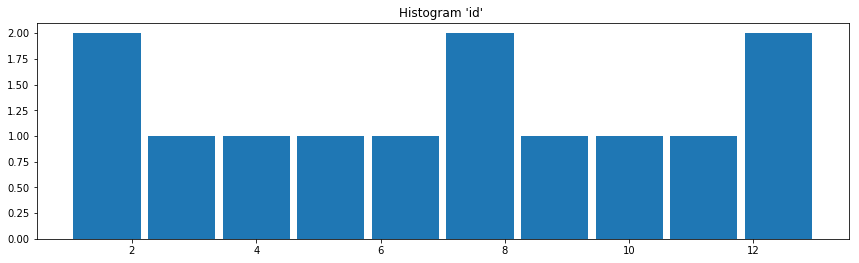

In [30]:
df.plot.hist("id")

In [31]:
df.head()

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up


In [32]:
import pandas as pd
def func(a):
    return a.min() 
df1 = df.map_partitions(func)

In [33]:
print(df1.compute())

id             1.0
billingId    123.0
price          3.0
dtype: float64


In [34]:
df.ext.to_dict()

[OrderedDict([('id', 1),
              ('firstName', 'Luis'),
              ('lastName', 'Alvarez$$%!'),
              ('billingId', 123.0),
              ('product', 'Cake'),
              ('price', 10.0),
              ('birth', '1980/07/07'),
              ('dummyCol', 'never')]),
 OrderedDict([('id', 2),
              ('firstName', 'André'),
              ('lastName', 'Ampère'),
              ('billingId', 423.0),
              ('product', 'piza'),
              ('price', 8.0),
              ('birth', '1950/07/08'),
              ('dummyCol', 'gonna')]),
 OrderedDict([('id', 3),
              ('firstName', 'NiELS'),
              ('lastName', 'Böhr//((%%'),
              ('billingId', 551.0),
              ('product', 'pizza'),
              ('price', 8.0),
              ('birth', '1990/07/09'),
              ('dummyCol', 'give')]),
 OrderedDict([('id', 4),
              ('firstName', 'PAUL'),
              ('lastName', 'dirac$'),
              ('billingId', 521.0),
              (

In [35]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [16]:
df.cols.max(["id","billingId"])

{'id': {'max': 13.0}, 'billingId': {'max': 992.0}}

In [17]:
df.cols.count_na("*")

{'id': {'count_na': 0},
 'firstName': {'count_na': 1},
 'lastName': {'count_na': 1},
 'billingId': {'count_na': 1},
 'product': {'count_na': 1},
 'price': {'count_na': 1},
 'birth': {'count_na': 1},
 'dummyCol': {'count_na': 1}}

In [18]:
df.cols.max("*")

{'id': {'max': 13.0}, 'billingId': {'max': 992.0}, 'price': {'max': 10.0}}

In [19]:
df.cols.kurt("id")

{'id': 1.7857142857142858}

In [20]:
df.cols.range("id")

{'id': {'min': 1, 'max': 13}}

In [21]:
import pandas as pd
import dask
    
dict = {'Geeks' : 10, 
        'for' : 20, 
        'geeks' : 30}

from dask import dataframe as dd
# func = df[col].nunique
ps = [{col:df[col].nunique()} for col in df.cols.names()]
b= {"count_uniques":ps}
dd.compute(b)
print(b)
# df["id"].nunique().compute()

dd.compute(b)

{'count_uniques': [{'id': dd.Scalar<series-..., dtype=int32>}, {'firstName': dd.Scalar<series-..., dtype=int32>}, {'lastName': dd.Scalar<series-..., dtype=int32>}, {'billingId': dd.Scalar<series-..., dtype=int32>}, {'product': dd.Scalar<series-..., dtype=int32>}, {'price': dd.Scalar<series-..., dtype=int32>}, {'birth': dd.Scalar<series-..., dtype=int32>}, {'dummyCol': dd.Scalar<series-..., dtype=int32>}]}


({'count_uniques': [{'id': 13},
   {'firstName': 12},
   {'lastName': 12},
   {'billingId': 12},
   {'product': 7},
   {'price': 5},
   {'birth': 12},
   {'dummyCol': 8}]},)

In [22]:
d = {'count_uniques': {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}}
d1 = {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}

In [23]:
list(d.values())[0]

{'id': 13.001289538211168,
 'firstName': 13.001289538211168,
 'lastName': 13.001289538211168,
 'billingId': 13.001289538211168,
 'product': 8.000488320990067,
 'price': 6.000274674963478,
 'birth': 13.001289538211168,
 'dummyCol': 9.000618037546497}

In [24]:
c = next(iter(d))
asd = pd.Series(d[c])
print(asd)
for a in asd.index:
    print(a)
    print(asd[a])

id           13.001290
firstName    13.001290
lastName     13.001290
billingId    13.001290
product       8.000488
price         6.000275
birth        13.001290
dummyCol      9.000618
dtype: float64
id
13.001289538211168
firstName
13.001289538211168
lastName
13.001289538211168
billingId
13.001289538211168
product
8.000488320990067
price
6.000274674963478
birth
13.001289538211168
dummyCol
9.000618037546497


In [35]:
df.cols.min("*")

COL_NAME id             1.0
billingId    123.0
price          3.0
dtype: float64


{'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}

In [36]:
df.cols.count_uniques("*")

COL_NAME {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}


{'id': 13.001289538211168,
 'firstName': 13.001289538211168,
 'lastName': 13.001289538211168,
 'billingId': 13.001289538211168,
 'product': 8.000488320990067,
 'price': 6.000274674963478,
 'birth': 13.001289538211168,
 'dummyCol': 9.000618037546497}

In [81]:
df.cols.percentile("*")

COL_NAME       id  billingId  price
0.5  7.0      587.5    8.0
PERCENTILE 1       id  billingId  price
0.5  7.0      587.5    8.0
PERCENTILE       id  billingId  price
0.5  7.0      587.5    8.0
<class 'dict'>
RESULT {'id': {'percentile': {'0.5': 7.0}}, 'billingId': {'percentile': {'0.5': 587.5}}, 'price': {'percentile': {'0.5': 8.0}}}


{'id': {'percentile': {'0.5': 7.0}},
 'billingId': {'percentile': {'0.5': 587.5}},
 'price': {'percentile': {'0.5': 8.0}}}

In [37]:
df.cols.count_na("*")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME firstName
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME lastName
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME billingId
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME product
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME price
COL 

{'id': {'count_na': 0},
 'firstName': {'count_na': 1},
 'lastName': {'count_na': 1},
 'billingId': {'count_na': 1},
 'product': {'count_na': 1},
 'price': {'count_na': 1},
 'birth': {'count_na': 1},
 'dummyCol': {'count_na': 1}}

In [36]:
df = df.ext.send(output="json", infer=False, advanced_stats=False)

<class 'dict'>
COL NAME id
COL NAME RESULT {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}
AGG NAME count_uniques


TypeError: 'numpy.float64' object is not iterable

In [ ]:
df.ext.display()

In [59]:
df["firstName"].min().compute()

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply at 0x000001376AF3B708>, <function _reduction_aggregate at 0x000001376DD36048>, [(<function _concat at 0x000001376C680048>, [(<function apply at 0x000001376AF3B708>, <function _reduction_chunk at 0x000001376DD35EE8>, [(<built-in function getitem>, (<function check_meta at 0x000001376DC9AF78>, (<function apply at 0x000001376AF3B708>, <function pandas_read_text at 0x000001376DD5DB88>, [<function _make_parser_function.<locals>.parser_f at 0x000001376D8F84C8>, (<function read_block_from_file at 0x000001376DB1B798>, <dask.bytes.core.OpenFile object at 0x0000013701F15948>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'None']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtyp

TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:
df.cols.zero

In [153]:
import dask.array as da
x = da.random.random((2, 2), chunks=(5, 5))

In [154]:
for i in x:
    print(i)

dask.array<getitem, shape=(2,), dtype=float64, chunksize=(2,)>
dask.array<getitem, shape=(2,), dtype=float64, chunksize=(2,)>


In [75]:
df.cols.skewness(["id","price"])

COL_NAME {'id': 0.0, 'price': nan}
<class 'dict'>
COL NAME 1- id
VALUE 1- 0.0
AGG NAME 1- skewness
****
COL NAME 1- price
VALUE 1- nan
AGG NAME 1- skewness
****
RESULT {'id': {'skewness': 0.0}, 'price': {'skewness': nan}}


{'id': {'skewness': 0.0}, 'price': {'skewness': nan}}

In [74]:
df.cols.kurt(["id"])

COL_NAME {'id': 1.7857142857142858}
<class 'dict'>
COL NAME 1- id
VALUE 1- 1.7857142857142858
AGG NAME 1- kurtosis
****
RESULT {'id': {'kurtosis': 1.7857142857142858}}


{'id': {'kurtosis': 1.7857142857142858}}

In [76]:
exprs=[]
from dask import dataframe as dd
# funcs = [df.functions.stddev, df.functions.kurtosis, df.functions.mean, df.functions.skewness,
#                          df.functions.sum, df.functions.variance, df.functions.zeros_agg]

funcs = [df.functions.stddev, df.functions.kurtosis, df.functions.mean, df.functions.skewness,df.functions.sum, df.functions.variance, df.functions.zeros_agg]

z = df.cols.agg_exprs(["id","price"], funcs, df)

dd.compute(z)

COL_NAME {'id': 0.0, 'price': nan}
<class 'dict'>
COL NAME 1- id
VALUE 1- 0.0
AGG NAME 1- skewness
****
COL NAME 1- price
VALUE 1- nan
AGG NAME 1- skewness
****
RESULT {'id': {'skewness': 0.0}, 'price': {'skewness': nan}}
COL_NAME {'id': 1.7857142857142858, 'price': nan}
<class 'dict'>
COL NAME 1- id
VALUE 1- 1.7857142857142858
AGG NAME 1- kurtosis
****
COL NAME 1- price
VALUE 1- nan
AGG NAME 1- kurtosis
****
RESULT {'id': {'skewness': 0.0, 'kurtosis': 1.7857142857142858}, 'price': {'skewness': nan, 'kurtosis': nan}}
COL_NAME id       15.166667
price     7.719697
dtype: float64
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id       15.166667
price     7.719697
dtype: float64
AGG NAME variance
****
COL NAME price
COL NAME RESULT id       15.166667
price     7.719697
dtype: float64
AGG NAME variance
****
RESULT {'id': {'skewness': 0.0, 'kurtosis': 1.7857142857142858, 'variance': 15.166666666666666}, 'price': {'skewness': nan, 'kurtosis': nan, 'variance': 7.7196969696969

({'id': {'skewness': 0.0,
   'kurtosis': 1.7857142857142858,
   'variance': 15.166666666666666,
   'sum': 91.0,
   'mean': 7.0,
   'stddev': 3.8944404818493075,
   'zeros': 0},
  'price': {'skewness': nan,
   'kurtosis': nan,
   'variance': 7.719696969696966,
   'sum': 77.0,
   'mean': 6.416666666666667,
   'stddev': 2.7784342658585546,
   'zeros': 0}},)

In [187]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [79]:
df.cols.mad("id")

{'id': {'id': {'mad': 3.0}}}

In [80]:
df.cols.hist("id")

COL_NAME id    1
dtype: int64
<class 'pandas.core.series.Series'>
RESULT {'id': {'min': 1}}
COL_NAME id    13
dtype: int64
<class 'pandas.core.series.Series'>
RESULT {'id': {'min': 1, 'max': 13}}
COL_NAME {'id': {'count': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 'bins': [1.0, 1.6, 2.2, 2.8, 3.4, 4.0, 4.6, 5.2, 5.8, 6.3999999999999995, 7.0, 7.6, 8.2, 8.8, 9.4, 10.0, 10.6, 11.2, 11.799999999999999, 12.4, 13.0]}}
<class 'dict'>
RESULT {'id': {'hist': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6}, {'count': 1, 'lower': 1.6, 'upper': 2.2}, {'count': 0, 'lower': 2.2, 'upper': 2.8}, {'count': 1, 'lower': 2.8, 'upper': 3.4}, {'count': 0, 'lower': 3.4, 'upper': 4.0}, {'count': 1, 'lower': 4.0, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.2}, {'count': 0, 'lower': 5.2, 'upper': 5.8}, {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995}, {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0}, {'count': 1, 'lower': 7.0, 'upper': 7.6}, {'count': 1, 'lower': 7.6

{'id': {'hist': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6},
    {'count': 1, 'lower': 1.6, 'upper': 2.2},
    {'count': 0, 'lower': 2.2, 'upper': 2.8},
    {'count': 1, 'lower': 2.8, 'upper': 3.4},
    {'count': 0, 'lower': 3.4, 'upper': 4.0},
    {'count': 1, 'lower': 4.0, 'upper': 4.6},
    {'count': 1, 'lower': 4.6, 'upper': 5.2},
    {'count': 0, 'lower': 5.2, 'upper': 5.8},
    {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995},
    {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0},
    {'count': 1, 'lower': 7.0, 'upper': 7.6},
    {'count': 1, 'lower': 7.6, 'upper': 8.2},
    {'count': 0, 'lower': 8.2, 'upper': 8.8},
    {'count': 1, 'lower': 8.8, 'upper': 9.4},
    {'count': 0, 'lower': 9.4, 'upper': 10.0},
    {'count': 1, 'lower': 10.0, 'upper': 10.6},
    {'count': 1, 'lower': 10.6, 'upper': 11.2},
    {'count': 0, 'lower': 11.2, 'upper': 11.799999999999999},
    {'count': 1, 'lower': 11.799999999999999, 'upper': 12.4},
    {'count': 1, 'lower': 12.4, 'uppe

In [98]:
df.plot.hist("id")

AttributeError: 'DataFrame' object has no attribute 'plot'

In [26]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [31]:
df.cols.std("firstName")

ValueError: 'columns' must be 'not None', received 'None'

In [10]:
from optimus.profiler.profiler import Profiler
p = Profiler()
p.run(df,"firstName", advanced_stats=True)
# p.columns_agg(df,"*", advanced_stats=False)

{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'

TypeError: unsupported operand type(s) for ** or pow(): 'Array' and 'float'

In [ ]:
p.send()

In [77]:
df.ext.send()

COL_NAME id             1.0
billingId    123.0
price          3.0
dtype: float64
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME billingId
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME price
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
RESULT {'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}
COL_NAME id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME firstName
COL NAME RESULT id           0
firstName    1
lastName    

SEND {"count_types": {"int": 1, "object": 5, "float": 2, "array": 0, "binary": 0, "numeric": 0, "categorical": 0, "null": 0, "date": 0}, "total_count_dtypes": 3, "dtypes_list": ["int", "object", "float"], "columns": {"id": {"stats": {"min": 1.0, "count_na": null, "max": 13.0, "count_uniques": 13.001289538211168, "hist": {"count": [null, null, null, null, null, null, null, null, null, null, null, null], "bins": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]}}, "name": "id", "column_dtype": "int", "dtypes_stats": {"int": null, "float": 0, "object": 0}, "column_type": "numeric", "id": null}, "firstName": {"stats": {"count_na": null, "count_uniques": 13.001289538211168}, "name": "firstName", "column_dtype": "object", "dtypes_stats": {"int": 0, "float": 0, "object": null}, "column_type": null, "id": null}, "lastName": {"stats": {"count_na": null, "count_uniques": 13.001289538211168}, "name": "lastName", "column_dtype": "object", "dtypes_stats": {"int": 0, "float": 0, 

Send!


In [5]:
op= Optimus("dask", comm=True)

In [124]:
# url = "https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/crime.csv"
url = "data/crime.csv"

In [125]:
import pandas as pd
pd.read_csv(url, encoding='latin1')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [126]:
from dask import dataframe as dd
df = dd.read_csv(url, encoding='latin1').reset_index()

In [127]:
df.rows.limit(5).ext.display()

index 1 (int64) not nullable,INCIDENT_NUMBER 2 (object) not nullable,OFFENSE_CODE 3 (int64) not nullable,OFFENSE_CODE_GROUP 4 (object) not nullable,OFFENSE_DESCRIPTION 5 (object) not nullable,DISTRICT 6 (object) not nullable,REPORTING_AREA 7 (object) not nullable,SHOOTING 8 (object) not nullable,OCCURRED_ON_DATE 9 (object) not nullable,YEAR 10 (int64) not nullable,MONTH 11 (int64) not nullable,DAY_OF_WEEK 12 (object) not nullable,HOUR 13 (int64) not nullable,UCR_PART 14 (object) not nullable,STREET 15 (object) not nullable,Lat 16 (float64) not nullable,Long 17 (float64) not nullable,Location 18 (object) not nullable
0,I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
2,I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
3,I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
4,I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"


In [129]:
df.cols.min("index")

{'index': {'min': 0}}

In [130]:
df.cols.min("*")

{'index': {'min': 0},
 'INCIDENT_NUMBER': {'min': '142052550'},
 'OFFENSE_CODE': {'min': 111},
 'OFFENSE_CODE_GROUP': {'min': 'Aggravated Assault'},
 'OFFENSE_DESCRIPTION': {'min': 'A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.'},
 'REPORTING_AREA': {'min': ' '},
 'OCCURRED_ON_DATE': {'min': '2015-06-15 00:00:00'},
 'YEAR': {'min': 2015},
 'MONTH': {'min': 1},
 'DAY_OF_WEEK': {'min': 'Friday'},
 'HOUR': {'min': 0},
 'Lat': {'min': -1.0},
 'Long': {'min': -71.17867378},
 'Location': {'min': '(-1.00000000, -1.00000000)'}}

In [132]:
df.cols.percentile("index")

{'index': {'0.5': 159536.0}}

In [133]:
df.cols.percentile("*")

{'index': {'0.5': 159536.0},
 'OFFENSE_CODE': {'0.5': 2907.0},
 'YEAR': {'0.5': 2017.0},
 'MONTH': {'0.5': 7.0},
 'HOUR': {'0.5': 14.0},
 'Lat': {'0.5': 42.32553801},
 'Long': {'0.5': -71.07752376}}

In [134]:
a = {0.25: 3.5, 0.5: 6.0, 0.75: 8.5}

In [135]:
print(a)

{0.25: 3.5, 0.5: 6.0, 0.75: 8.5}


In [136]:
df.rows.select((df["num"] >= 6.8) & (df["num"] <= 99.3)).rows.limit(10).ext.display()

KeyError: 'num'

In [ ]:
df.outliers.tukey("num").select().ext.display()

In [39]:
from dask import dataframe as dd
df = dd.read_csv("data/foo.csv", sep=",").head(20)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 20 elements requested, only 19 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


In [52]:
df.rows.between("id",1,5).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you


In [54]:
df1 = df.rows.append(df)

In [66]:
df1.ext.display()

NameError: name 'df1' is not defined

In [ ]:
#https://github.com/dask/dask/pull/4229#issuecomment-449123512


In [178]:
df["id"].mode().compute()

AttributeError: 'Series' object has no attribute 'mode'

In [114]:
import pandas as pd

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=0)

NameError: name 'pd' is not defined

In [21]:
df.head(20)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 20 elements requested, only 13 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,6,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [19]:
df.cols.names()

['id',
 'firstName',
 'lastName',
 'billingId',
 'product',
 'price',
 'birth',
 'dummyCol']

In [6]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='false', null_value="None")

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [7]:
df.rows.limit(5).cols.lower("lastName").ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,einstein,634.0,pizza,8.0,1990/07/11,up


In [8]:
df.rows.limit(5).cols.min_max_scaler("billingId").ext.display()

..\optimus\engines\base\dask\columns.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  scaler.transform(_df)[input_cols]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [49]:
df.ext.display(13)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [64]:
df.cols.impute("billingId",output_cols="hola").ext.display(13)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable,hola 9 (float64) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never,123.0
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna,423.0
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give,551.0
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you,521.0
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up,634.0
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never,672.0
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna,323.0
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let,624.0
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you,735.0
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down,875.0


In [ ]:
df.cols.impute("billingId",output_cols="new_col").ext.display(13)

In [46]:
df.cols.count_na("*")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME firstName
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME lastName
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME billingId
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME product
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME price
COL 

{'id': {'count_na': 0},
 'firstName': {'count_na': 1},
 'lastName': {'count_na': 1},
 'billingId': {'count_na': 1},
 'product': {'count_na': 1},
 'price': {'count_na': 1},
 'birth': {'count_na': 1},
 'dummyCol': {'count_na': 1}}

In [21]:
import pandas as pd
data = {'col_0': [9, -3, 0, -1, 5], 'col_1': [-2, -7, 6, 8, -5]}
df = pd.DataFrame(data)
df.head()

,col_0,col_1
0,9,-2
1,-3,-7
2,0,6
3,-1,8
4,5,-5


In [25]:
df["col_0"].clip( 1, 5)

0    5
1    1
2    1
3    1
4    5
Name: col_0, dtype: int64

In [31]:
df.head(10)

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,5,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,5,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,5,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,5,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,5,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [34]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='false', null_value="None")

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [54]:
df.cols.min("id")

{'min': {'id': 1, 'min': [('min', id    1
    dtype: int64)]}}

In [54]:
df.cols.min("*")

COL_NAME id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME billingId
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME price
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
RESULT {'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}


{'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}

In [55]:
df.cols.percentile("id")

COL_NAME 0.5    7.0
Name: id, dtype: float64
AGG NAME percentile
<class 'pandas.core.series.Series'>
COL NAME 0.5
COL NAME RESULT 0.5    7.0
Name: id, dtype: float64
AGG NAME percentile
****
RESULT {0.5: {'percentile': 7.0}}


{0.5: {'percentile': 7.0}}

In [47]:
df.cols.iqr(["id","price"])

<class 'dict'>
INDEX {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}
COL NAME id
COL NAME RESULT {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}
AGG NAME percentile
****
COL NAME price
COL NAME RESULT {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}
AGG NAME percentile
****
RESULT {'id': {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}, 'price': {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}}


KeyError: 'percentile'

In [12]:
df.cols.min("*")

{'min': {'id': 1.0, 'billingId': 123.0, 'price': 3.0}}

In [38]:
df.head(12)

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,5,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,5,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,5,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,5,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,5,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [37]:
df.cols.clip("id",1,5).head(10)

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,5,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,5,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,5,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,5,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,5,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [ ]:
df.cols.qcult()

In [51]:
df.ext.display(13)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [ ]:
pd.DataFrame([[np.nan, 'dogs', 3]], index=df.index)

In [63]:
from sklearn.preprocessing import MinMaxScaler
import dask.dataframe as dd
import dask.array as da

scaler = MinMaxScaler()
columns = ['billingId','price']
b =df[columns]
scaler.fit(b)
c = dd.from_dask_array(da.from_array(scaler.transform(b), chunks=100),columns)

print(c.head())
# df.assign(e=c['price'])


# # print(dd.from_dask_array(c, columns).head(10))
# df[columns]= dd.from_dask_array(c)

   billingId     price
0   0.000000  1.000000
1   0.345224  0.714286
2   0.492520  0.714286
3   0.457998  0.714286
4   0.588032  0.714286


In [63]:
print(df1)

[[0.         1.        ]
 [0.3452244  0.71428571]
 [0.49252014 0.71428571]
 [0.4579977  0.71428571]
 [0.58803222 0.71428571]
 [0.63176064 0.28571429]
 [0.2301496  0.        ]
 [0.57652474 0.        ]
 [0.70425777 0.        ]
 [0.86536249 0.        ]
 [1.         0.85714286]
 [0.12773303 0.85714286]
 [       nan        nan]]


In [ ]:
df.ext.display()

In [10]:
df.ext.sample(5).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down
12,Emmy%%,Nöether$,234.0,pasta,9.0,1993/12/08,gonna
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up


In [23]:
df.ext.stratified_sample("firstName").ext.display()

..\optimus\engines\dask\extension.py:156: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  df_ = df.groupby(col_name).apply(lambda x: x.sample(2))
distributed.worker - WARNING -  Compute Failed
Function:  subgraph_callable
args:      ()
kwargs:    {}
Exception: ValueError("Cannot take a larger sample than population when 'replace=False'")



ValueError: Cannot take a larger sample than population when 'replace=False'

In [15]:
df.rows.limit(5).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never


In [7]:
df.cols.min("")

TypeError: min() missing 1 required positional argument: 'columns'

In [21]:
df.rows.sort("billingId","asc").ext.display()

TypeError: Can't instantiate abstract class Cols with abstract methods apply_by_dtypes, apply_expr, astype, boxplot, bucketizer, cell, clip, copy, correlation, count_mismatch, count_na, count_uniques, count_zeros, drop, frequency_by_group, get_meta, impute, index_to_string, iqr, is_na, keep, max_abs_scaler, min_max_scaler, move, nunique, qcut, remove, remove_accents, remove_special_chars, remove_white_spaces, replace_regex, reverse, scatter, select_by_dtypes, set, set_meta, sort, string_to_index, to_timestamp, unique, value_counts, values_to_cols, years_between, z_score

In [36]:
df.cols.max("price")

{'max': {'price': 10.0}}

In [ ]:

df.cols.create_expr()

In [30]:
df.dropna(how='any', subset=['price'])

,id,firstName,lastName,billingId,product,price,birth,dummyCol
npartitions=1,,,,,,,,
,int64,object,object,float64,object,float64,object,object
,...,...,...,...,...,...,...,...


In [32]:
df.rows.drop_na("price").ext.display()

any price


id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [ ]:
df[col_name].dtype
# format_dict([np.dtype(df[col_name].dtype).type for col_name in columns])

In [12]:
c = df.cols.names()

In [9]:
df.set_index("billingId").reset_index()[c].head()

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,12,Emmy%%,Nöether$,234.0,pasta,9.0,1993/12/08,gonna
2,7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
3,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
4,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you


In [172]:
df.cols.mode("id")

,price
price,
3.0,3.0
5.0,5.0
8.0,8.0
9.0,9.0
10.0,10.0


In [132]:
df.ext.display(20)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [103]:
df1= op.load.csv("data/foo.csv", sep=",", header=True, infer_schema='true', charset="ISO-8859–1", null_value="None")

data/foo.csv


In [108]:
df1.ext.display(20)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423,piza,8,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,735,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [70]:
df.cols.dtypes()

{'id': 'int64',
 'firstName': 'object',
 'lastName': 'object',
 'billingId': 'float64',
 'product': 'object',
 'price': 'float64',
 'birth': 'object',
 'dummyCol': 'object'}

In [65]:
df.ext.display(20)

20


id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [8]:
df.save.csv("data/dask/*.csv")

In [9]:
df.save.parquet("data/dask/foo.parquet")

In [11]:
df.save.json("data/dask/*.json")

In [12]:
df.rows.create_id()

Dask DataFrame Structure:
                  id firstName lastName billingId product    price   birth dummyCol
npartitions=1                                                                      
               int64    object   object   float64  object  float64  object   object
                 ...       ...      ...       ...     ...      ...     ...      ...
Dask Name: from-delayed, 3 tasks


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [36]:
df1 = df[(df.id > 0) & (df.id <= 7)]
df2 = df1[(df.id > 0) & (df.id <= 3)]

In [38]:
df2.compute().head()

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\utils.py:694: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return getattr(obj, self.method)(*args, **kwargs)


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give


In [61]:
df.rows.select((df.id ==1 ) ).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never


In [58]:
df.rows.select_by_dtypes("id", "str").ext.display()

AttributeError: 'NoneType' object has no attribute '_jvm'

In [59]:
df.set_index('price').compute()

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,firstName,lastName,billingId,product,birth,dummyCol
price,,,,,,,
3.0,7,CaRL,Ga%%%uss,323.0,taco,1970/07/13,gonna
3.0,8,David,H$$$ilbert,624.0,taaaccoo,1950/07/14,let
3.0,9,Johannes,KEPLER,735.0,taco,1920/04/22,you
3.0,10,JaMES,M$$ax%%well,875.0,taco,1923/03/12,down
5.0,6,Galileo,GALiLEI,672.0,arepa,1930/08/12,never
8.0,2,AndrÃ©,AmpÃ¨re,423.0,piza,1950/07/08,gonna
8.0,3,NiELS,BÃ¶hr//((%%,551.0,pizza,1990/07/09,give
8.0,4,PAUL,dirac$,521.0,pizza,1954/07/10,you
8.0,5,Albert,Einstein,634.0,pizza,1990/07/11,up


In [8]:
%%time
df.cols.min(["billingId"])

Wall time: 195 ms


{'min': {'billingId': 123.0}}

In [9]:
%%time
df.cols.max(["billingId"])

Wall time: 152 ms


{'max': {'billingId': 992.0}}

In [10]:
df.cols.names()

['id',
 'firstName',
 'lastName',
 'billingId',
 'product',
 'price',
 'birth',
 'dummyCol']

In [11]:
df.meta.get()

{'file_name': 'foo.csv', 'transformations': {'actions': {}}}

In [127]:
df.cols.rename("id", "id1")

,id1,firstName,lastName,billingId,product,price,birth,dummyCol
npartitions=1,,,,,,,,
,int64,object,object,float64,object,float64,object,object
,...,...,...,...,...,...,...,...


In [13]:
df.ext.display("all")

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [20]:
df.cols.remove_special_chars("lastName")

AttributeError: 'Cols' object has no attribute 'remove_special_chars'

In [15]:
df.ext.send()

AttributeError: type object 'Profiler' has no attribute 'instance'

In [24]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [25]:
df.cols.replace("lastName","$", "","chars")

ValueError: 'columns' must be 'not None', received 'None'

In [9]:
from optimus.profiler.profiler import Profiler
p = Profiler()

df.cols.count_by_dtypes("*")

{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'

{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'

{'id': {'int': 0, 'float': 0, 'object': 0},
 'firstName': {'int': 0, 'float': 0, 'object': 0},
 'lastName': {'int': 0, 'float': 0, 'object': 0},
 'billingId': {'int': 0, 'float': 0, 'object': 0},
 'product': {'int': 0, 'float': 0, 'object': 0},
 'price': {'int': 0, 'float': 0, 'object': 0},
 'birth': {'int': 0, 'float': 0, 'object': 0},
 'dummyCol': {'int': 0, 'float': 0, 'object': 0}}

In [1]:
import dask
import dask.datasets
import numpy as np
import time
from distributed import Client

client = Client()
client

df = dask.datasets.timeseries()
df = df.repartition(npartitions=300)
df = client.persist(df)


C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\io\demo.py:91: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=partition_freq))
C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


In [4]:
def random_indexer(df):
    indexer = ~df.index.isnull()
    for i in range(np.random.randint(15)+1):
        col = np.random.choice(['x','y'])
        value = np.random.uniform(-1,1)
        op = np.random.choice([lambda x, y: x < y, lambda x, y: x > y])
        indexer = np.logical_and(indexer, op(df[col], value))
    return indexer

def random_statistic(indexer, df):
    print(indexer)
    col = np.random.choice(['x', 'y', 'name'])
    if col == 'name':
        op = np.random.choice([lambda x: x.unique().size, np.min, np.max])
    else:
        op = np.random.choice([lambda x: x.unique().size, np.min, np.max, np.sum, np.mean])
    return op(df[col][indexer])

np.random.seed(137)

stats = []
for i in range(10):
    ind = random_indexer(df)
    for k in range(20):
        stats.append(random_statistic(ind, df))

st = time.time()
print(stats)
# stat_computed = client.compute(stats)
ft = time.time()
print(ft-st)

st = time.time()
# stat_results = client.gather(stat_computed)
ft = time.time()
print(ft-st)

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

In [9]:
df.head()

CancelledError: ('repartition-merge-39715e6237c8baf832ed85d511f135a3', 0)

NameError: name 'op' is not defined

In [14]:
stat_computed = client.compute(np.mode(df["id"]))
stat_results = client.gather(stat_computed)

AttributeError: module 'numpy' has no attribute 'mode'

In [13]:
print(stat_results)

1
